# Лабараторная №2

Работу выполнили:
* Куприянов Артур, P3212
* Колоколов Артём, P3212

## Импортируем библиотеки

Нам нужно сделать импорт основных библиотек:

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Предоставление данных

In [2]:
df = pd.read_csv('newData.csv', sep = ";")
df.head()

,Hour (Coded),Immobilized bus,Broken Truck,Vehicle excess,Accident victim,Running over,Fire vehicles,Occurrence involving freight,Incident involving dangerous freight,Lack of electricity,Fire,Point of flooding,Manifestations,Defect in the network of trolleybuses,Tree on the road,Semaphore off,Intermittent Semaphore,Slowness in traffic (%)
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.6
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.7
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9.2
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11.1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
Hour (Coded)                             135 non-null int64
Immobilized bus                          135 non-null int64
Broken Truck                             135 non-null int64
Vehicle excess                           135 non-null int64
Accident victim                          135 non-null int64
Running over                             135 non-null int64
Fire vehicles                            135 non-null int64
Occurrence involving freight             135 non-null int64
Incident involving dangerous freight     135 non-null int64
Lack of electricity                      135 non-null int64
Fire                                     135 non-null int64
Point of flooding                        135 non-null int64
Manifestations                           135 non-null int64
Defect in the network of trolleybuses    135 non-null int64
Tree on the road                         135 non-null i

In [4]:
df.shape

(135, 18)

In [5]:
type(df["Hour (Coded)"]), type(df["Slowness in traffic (%)"])

(pandas.core.series.Series, pandas.core.series.Series)

In [6]:
df.columns

Index(['Hour (Coded)', 'Immobilized bus', 'Broken Truck', 'Vehicle excess',
       'Accident victim', 'Running over', 'Fire vehicles',
       'Occurrence involving freight', 'Incident involving dangerous freight',
       'Lack of electricity', 'Fire', 'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore', 'Slowness in traffic (%)'],
      dtype='object')

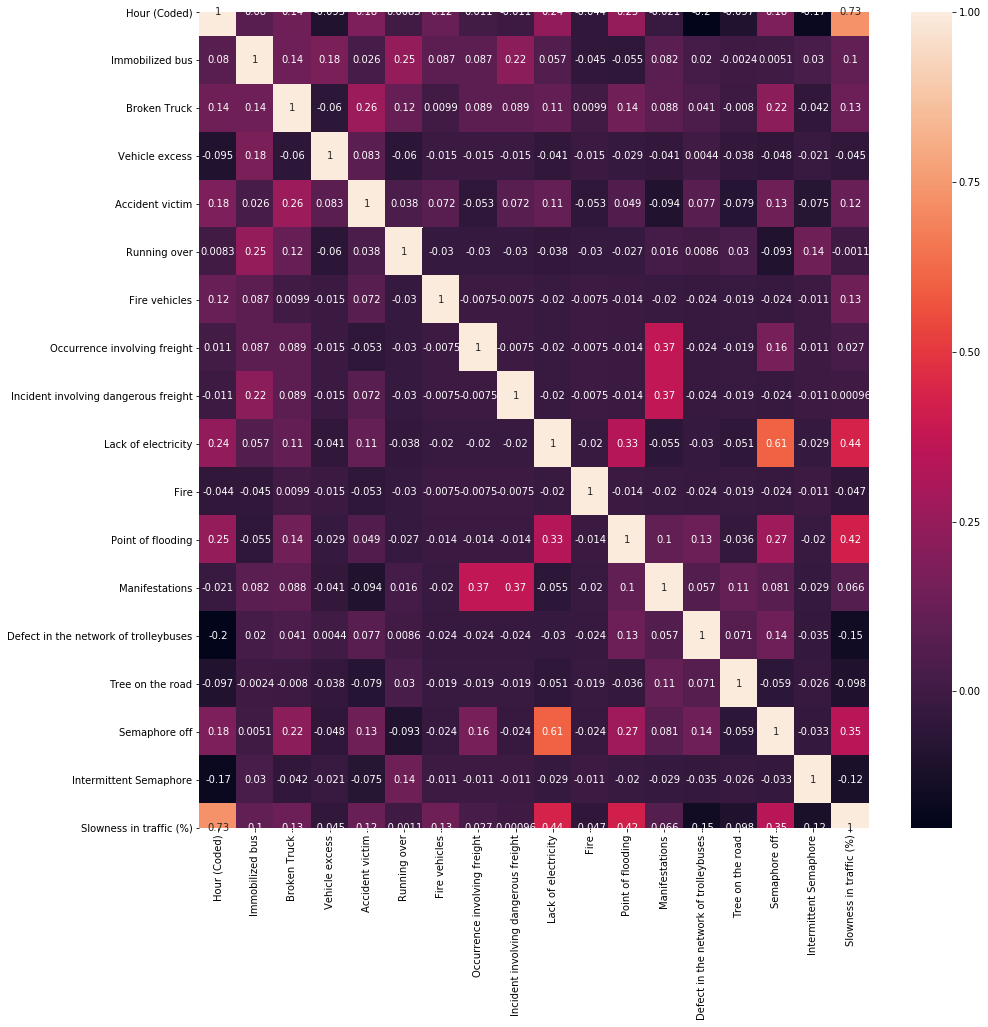

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['Hour (Coded)', 'Immobilized bus', 'Broken Truck', 'Vehicle excess',
       'Accident victim', 'Running over', 'Fire vehicles',
       'Occurrence involving freight', 'Incident involving dangerous freight',
       'Lack of electricity', 'Fire', 'Point of flooding', 'Manifestations',
       'Defect in the network of trolleybuses', 'Tree on the road',
       'Semaphore off', 'Intermittent Semaphore', 'Slowness in traffic (%)']
# figsize задает размер картинки в дюймах
fig, ax = plt.subplots(figsize=(15,15))
hm = sns.heatmap(df[cols].corr(),
                 cbar=True,
                 annot=True, ax=ax)

In [8]:
df_2 = df[['Hour (Coded)', 'Lack of electricity','Point of flooding','Defect in the network of trolleybuses','Intermittent Semaphore', 'Slowness in traffic (%)']]

Разделим датасет на тренировочную и тестовую выборку:

In [9]:
train, test = train_test_split(df_2, test_size=0.09)

In [10]:
train.shape, test.shape

((122, 6), (13, 6))

In [11]:
df_2.columns

Index(['Hour (Coded)', 'Lack of electricity', 'Point of flooding',
       'Defect in the network of trolleybuses', 'Intermittent Semaphore',
       'Slowness in traffic (%)'],
      dtype='object')

In [12]:
trainData = train.values
testData = test.values

In [21]:
print(trainData)

[[ 1.   0.   0.   0.   0.   3.4]
 [12.   0.   0.   0.   0.   7.9]
 [20.   0.   0.   0.   0.  13. ]
 [25.   0.   0.   0.   0.  11.8]
 [ 1.   0.   0.   8.   0.   3.4]
 [15.   0.   0.   1.   0.  10.3]
 [19.   0.   0.   0.   0.  12.2]
 [ 8.   0.   0.   0.   0.   8.2]
 [ 7.   0.   0.   0.   0.   8.3]
 [13.   0.   0.   0.   0.   4.8]
 [ 8.   1.   0.   0.   0.   6.5]
 [14.   0.   0.   0.   0.   7.8]
 [24.   0.   0.   0.   0.  18.3]
 [ 2.   0.   0.   0.   0.   6.3]
 [19.   0.   0.   0.   0.   6.7]
 [14.   0.   0.   0.   0.   4.9]
 [27.   0.   0.   0.   0.  19.3]
 [ 5.   0.   0.   0.   0.  10.3]
 [ 3.   0.   0.   0.   0.   8.7]
 [26.   0.   0.   0.   0.  17.4]
 [17.   0.   0.   0.   0.   8.3]
 [27.   0.   0.   0.   0.  12.1]
 [ 8.   0.   0.   0.   0.   6.6]
 [22.   0.   0.   0.   0.  13.1]
 [15.   0.   0.   0.   0.   5.1]
 [11.   0.   0.   0.   0.   7.7]
 [21.   0.   0.   0.   0.  14.6]
 [16.   0.   0.   0.   0.   5.3]
 [ 6.   0.   0.   0.   0.  10.9]
 [10.   0.   0.   0.   0.  12.3]
 [22.   0.

In [13]:
trainX = trainData[:, :5]
testX = testData[:, :5]
trainY = trainData[:, 5:]
testY = testData[:, 5:]

## Создаем модель регрессии

In [14]:
model = LinearRegression().fit(trainX, trainY)

## Получаем результаты

In [15]:
from sklearn.metrics import mean_squared_error

print('Coefficient (b₁): ', model.coef_)
print('Intercept (b₀): ', model.intercept_)
print('Mean squared error: ', mean_squared_error(testY, model.predict(testX)))
# Explained variance score: 1 is perfect
print('R² Value: ', model.score(trainX, trainY))

Coefficient (b₁):  [[ 0.36290307  1.83097061  1.1680219  -0.18042858 -0.30195265]]
Intercept (b₀):  [4.75034036]
Mean squared error:  5.192697585302961
R² Value:  0.6474294781419387


In [16]:
y_pred = model.predict(testX)
print(y_pred[:5])

[[12.73420794]
 [11.10216707]
 [ 8.74227415]
 [ 5.4761465 ]
 [10.91969258]]


In [17]:
print(testY[:5])

[[13.7]
 [10.5]
 [ 8.5]
 [ 6.6]
 [ 8.9]]


Приводим данные к типу Series

In [18]:
allX = df_2.values[:, :5]
pred = model.predict(allX)
pred = pd.Series(pred.reshape(pred.shape[0],))